In [337]:
# General & data preparation
import pandas as pd

# Data vizualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model and evaluation
import sklearn as scikit_learn
from sklearn.preprocessing import LabelEncoder

In [338]:
# Load the datasets
df_it1 = pd.read_csv("C:\\Users\\User\\Downloads\\set8_it1_cleaned.xls", sep=',')
df_it2 = pd.read_csv("C:\\Users\\User\\Downloads\\set8_it2.csv")

## **DATA UNDERSTANDING - add on dataset**

In [339]:
df_it2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DI                   2363 non-null   int64 
 1   StructuralIntegrity  2363 non-null   int64 
 2   ExteriorCharm        2363 non-null   object
dtypes: int64(2), object(1)
memory usage: 55.5+ KB


## **DATA PREPARATION**
* Initial merging of the cleaned dataset and the add-on dataset
* Cleaning duplicates to not have any missing values
* Setting initial calculations based on the income, loan, downpayments, etc

In [340]:
# Remove duplicate rows
df_it2 = df_it2.drop_duplicates()

In [341]:
# left merge on the cleaned dataset
df = df_it1.merge(df_it2, on='DI', how='left')

In [342]:
df.head(1)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,StructuralIntegrity,ExteriorCharm
0,0,125000.0,Meadowlands,Shadowmere,1032.0,9280.0,sqft,6,Common


## Assignment:
When buying a home, you need to take into account the mortgage that needs to be paid monthly. Assume the following:
* Income = 30000
* Interest rate per year: 4%
* Loan term = 30 years
* Downpayment = 20% of TradeValue

1. The loan that will determine the monthly payments, is the TradeValue minus the Downpayment (assume the household has that saved up). 
2. Figure out the total number of payments that need to be made over the entire loan term (each month during the entire loan term)
3. Calculate the monthly interest rate from the yearly interest rate, by dividing it by the amount of months in a year

To calculate the monthly payment, use: monthly payment = ( loan * interest per month * (1+ interest rate per month) ^ total number of payments  ) / ((1 + monthly interest rate) ^ payments - 1) or: P⋅r⋅(1+r)n(1+r)n−1

Where:
* P= loan amount
* r = monthly interest rate
* n = total number of payments

In [343]:
# Constants
annual_income = 30000
monthly_income = annual_income / 12
interest_rate_year = 0.04
interest_rate_month = interest_rate_year / 12
loan_term = 30
total_payments = loan_term * 12
df["Downpayment"] = df["TradeValue"] * 0.2
df["LoanAmount"] = df["TradeValue"] - df["Downpayment"]

# Monthly mortgage payment
df["MonthlyPayment"] = (
    df["LoanAmount"] * interest_rate_month * (1 + interest_rate_month) ** total_payments) / ((1 + interest_rate_month) ** total_payments - 1)

# Determine affordability
df["AffordableDwelling"] = (df["MonthlyPayment"] <= (0.3 * monthly_income)).astype(int)

# Affordability percentage by enclave


## **DATA UNDERSTANDING**

In [344]:
df.describe()

,DI,TradeValue,LivingQuarters,ParcelSize,StructuralIntegrity,Downpayment,LoanAmount,MonthlyPayment,AffordableDwelling
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,1173.400301,166555.341035,1092.845806,9000.326368,5.594174,33311.068207,133244.272828,636.128539,0.748368
std,673.780281,57277.850994,316.145836,3252.942449,1.117718,11455.570199,45822.280796,218.762577,0.434060
min,0.000000,12789.000000,256.000000,1470.000000,1.000000,2557.800000,10231.200000,48.845314,0.000000
25%,587.500000,128000.000000,843.000000,7200.000000,5.000000,25600.000000,102400.000000,488.873263,0.000000
50%,1178.000000,155000.000000,1070.000000,9069.000000,5.000000,31000.000000,124000.000000,591.994966,1.000000
75%,1756.500000,196750.000000,1289.500000,10955.000000,6.000000,39350.000000,157400.000000,751.451675,1.000000
max,2339.000000,337000.000000,2066.000000,17920.000000,9.000000,67400.000000,269600.000000,1287.111637,1.000000


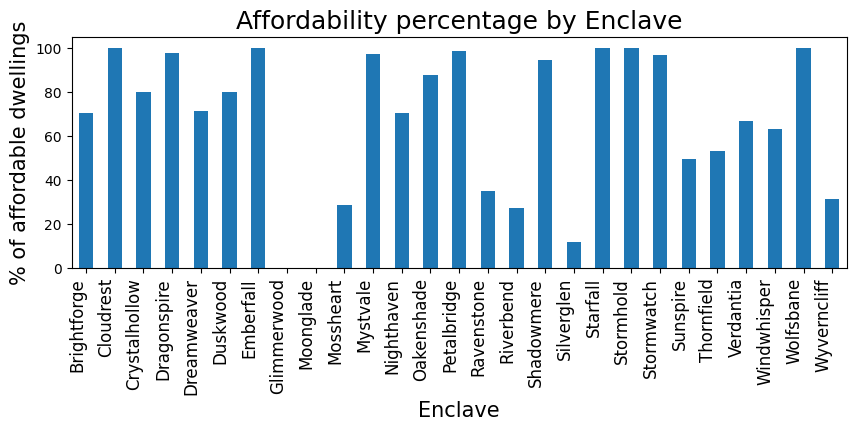

In [345]:
# Bar char showing affordability percentage by Enclave
affordability_by_enclave = df.groupby("Enclave")["AffordableDwelling"].mean() * 100
plt.figure(figsize=(10, 3))
affordability_by_enclave.plot.bar()
plt.title("Affordability percentage by Enclave", fontsize=18)
plt.xlabel("Enclave", fontsize=15)
plt.ylabel("% of affordable dwellings", fontsize=15)
plt.xticks(ha='right', rotation=90, fontsize=12)
plt.show()

In [346]:
# We are transforming the categorical data into numerical using the label encoder
df2 = df.copy()
df2 = df2.drop(columns=["ParcelSizeUnit", "DI", "Downpayment", "MonthlyPayment", "LoanAmount"])
df3 = df2.copy()
df4=df2.copy()
label_encoder = LabelEncoder()
df2['RealmType'] = label_encoder.fit_transform(df['RealmType'])
df2['Enclave'] = label_encoder.fit_transform(df['Enclave'])
df2['ExteriorCharm'] = label_encoder.fit_transform(df['ExteriorCharm'])

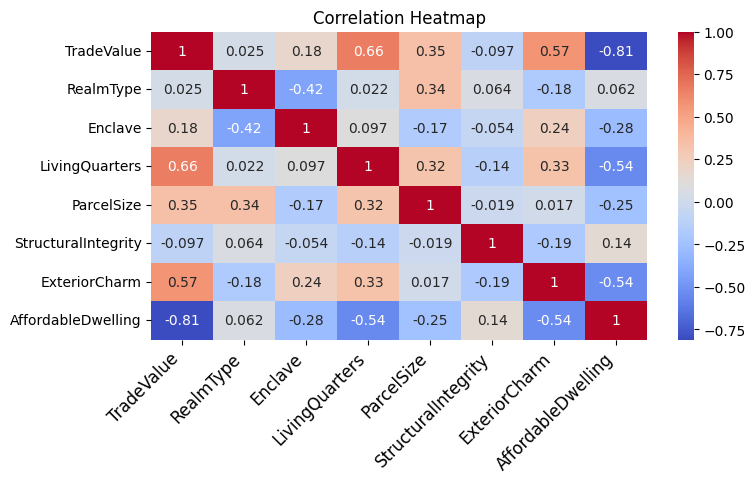

In [347]:
# Visualize the correlation with a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm")
plt.xticks(ha='right', rotation=45, fontsize=12)
plt.title("Correlation Heatmap")
plt.show()

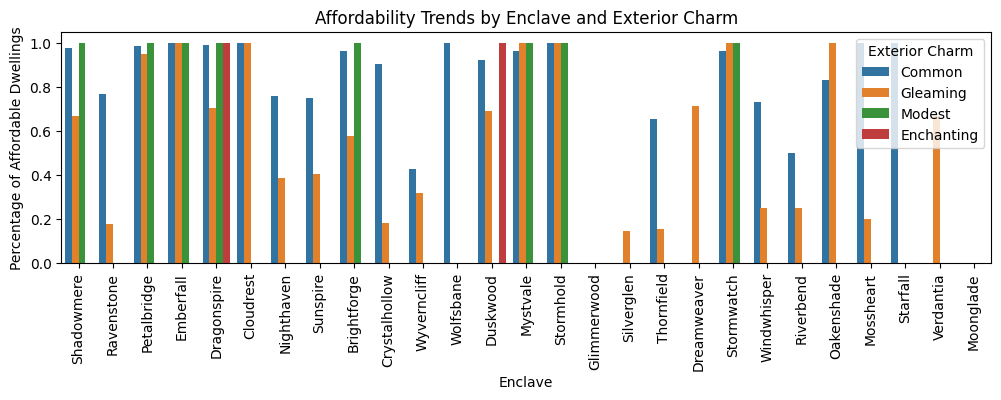

In [348]:
plt.figure(figsize=(12, 3))
sns.barplot(x="Enclave", y="AffordableDwelling", hue="ExteriorCharm", data=df, errorbar=None)
plt.title("Affordability Trends by Enclave and Exterior Charm")
plt.xlabel("Enclave")
plt.ylabel("Percentage of Affordable Dwellings")
plt.xticks(rotation=90)
plt.legend(title="Exterior Charm")
plt.show()

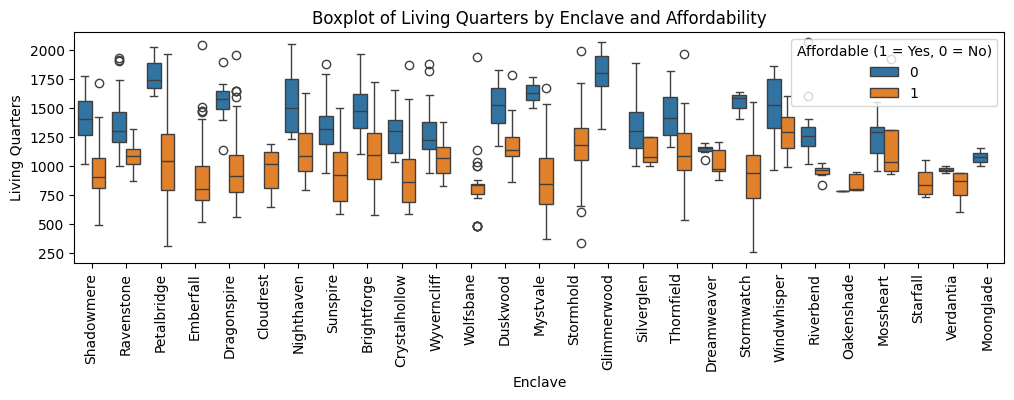

In [349]:
plt.figure(figsize=(12, 3))
sns.boxplot(x="Enclave", y="LivingQuarters", hue="AffordableDwelling", data=df)
plt.title("Boxplot of Living Quarters by Enclave and Affordability")
plt.xlabel("Enclave")
plt.ylabel("Living Quarters")
plt.xticks(rotation=90)
plt.legend(title="Affordable (1 = Yes, 0 = No)")
plt.show()

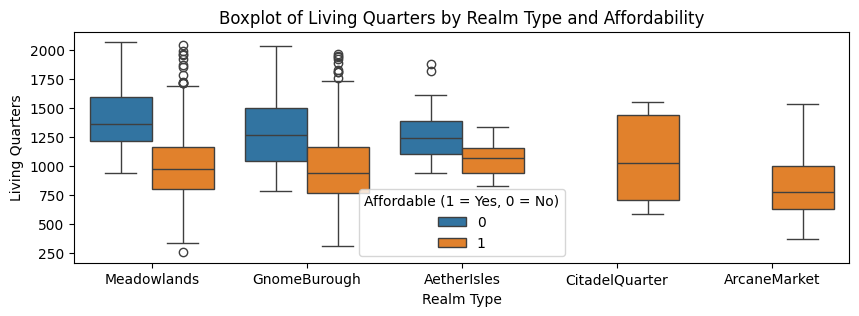

In [350]:
plt.figure(figsize=(10, 3))
sns.boxplot(x="RealmType", y="LivingQuarters", hue="AffordableDwelling", data=df)
plt.title("Boxplot of Living Quarters by Realm Type and Affordability")
plt.xlabel("Realm Type")
plt.ylabel("Living Quarters")
plt.legend(title="Affordable (1 = Yes, 0 = No)")
plt.show()

### **Modeling**
First, split the set into 70% training and 30% testing sets:

In [351]:
from sklearn.model_selection import train_test_split
# pop() can be used to extract a column from the dataframe and remove it from the dataframe at the same time

# target is called y a lot in documentation
target = df3.pop('AffordableDwelling')

# features is called X a lot in documentation
features = df3

# random_state to get reproduceable results
feature_train, feature_test, target_train, target_test = train_test_split(features, target, train_size=0.7, test_size=0.3, random_state=42)

In [352]:
print('The length of y_train is:', len(target_train))
print('The length of y_test is:', len(target_test))

The length of y_train is: 1393
The length of y_test is: 598


From the Data Understanding Diagrams, We gather that:
- The realm types 'CitadelQuarter' and 'ArcaneMarket' are always affordable
- Specific enclaves are always affordable and some are never affordable
- The modest exterior charm is always affordable
- The enchanting exterior charm is always affordable on 2 enclaves, never otherwise
- The common/gleaming Exterior charm is always affordable on some enclaves and partially on others(done with random)
- Mostly when the Living Quarters are more than 1500 the property is likely not afforable

Since we are making use of random, the results will always vary slightly

In [401]:
import random
def classification_model(row):
    if(row['LivingQuarters'] > 1500):
        prediction = 0
    if (row['Enclave'] in ['Glimmerwood', 'Moonglade']):
        prediction = 0
    elif(row['Enclave'] in ['Starfall', 'Stormhold', 'Wolfsbane', 'Oakenshade', 'Cloudrest', 'Emberfall']):
        prediction = 1
    elif(row['ExteriorCharm'] in ['Modest']):
        prediction = 1
    elif(row['RealmType'] in ['CitadelQuarter', 'ArcaneMarket']):
        prediction = 1
    elif(row['ExteriorCharm'] == 'Enchanting'):
        if(row['Enclave'] in ['Duskwood', 'Dragonspire']):
            prediction = 1
        else:
            prediction = 0
    elif(row['ExteriorCharm'] == 'Common'):
        if(row['Enclave'] in ['Shadowmere', 'Petalbridge', 'Dragonspire', 'Brightforge', 'Crystalhollow', 'Duskwood', 'Mystvale', 'Stormwatch', 'Mossheart']):
            prediction = 1
        elif(row['Enclave'] in ['Ravenstone', 'Sunspire', 'Nighthaven', 'Thornfield', 'Windwhisper']):
            prediction = 1 if round(random.uniform(0, 1), 3) <= 0.76 else 0
        elif(row['Enclave'] in ['Wyverncliff', 'Riverbend']):
            prediction = 1 if round(random.uniform(0, 1), 3) <= 0.5 else 0
        else:
            prediction = 0
    elif(row['ExteriorCharm'] == 'Gleaming'):
        if(row['Enclave'] in ['Petalbridge', 'Mystvale', 'Stormwatch']):
            prediction = 1
        elif(row['Enclave'] in ['Shadowmere', 'Dragonspire', 'Duskwood', 'Dreamweaver', 'Verdantia']):
            prediction = 1 if round(random.uniform(0, 1), 3) <= 0.685 else 0
        elif(row['Enclave'] in ['Nighthaven', 'Sunspire', 'Wyverncliff']):
            prediction = 1 if round(random.uniform(0, 1), 3) <= 0.385 else 0
        elif(row['Enclave'] in ['Windwhisper', 'Riverbend']):
            prediction = 1 if round(random.uniform(0, 1), 3) <= 0.335 else 0
        elif(row['Enclave'] in ['Ravenstone', 'Crystalhollow', 'Silverglen', 'Thornfield', 'Mossheart']):
            prediction = 1 if round(random.uniform(0, 1), 3) <= 0.195 else 0
        else:
            prediction = 0
    else:
        prediction = 0

    return prediction

## *Results:*

In [413]:
feature_train['Prediction'] = feature_train.apply(lambda row: classification_model(row), axis=1)
feature_test['Prediction'] = feature_test.apply(lambda row: classification_model(row), axis=1)

from sklearn.metrics import accuracy_score

print(f"Accuracy of train set: {round(accuracy_score(feature_train['Prediction'], target_train), 2) * 100}%")
print(f"Accuracy of test set: {round(accuracy_score(feature_test['Prediction'], target_test), 2) * 100}%")

Accuracy of train set: 82.0%
Accuracy of test set: 82.0%
